In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("customer_purchase_data.csv")
df.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

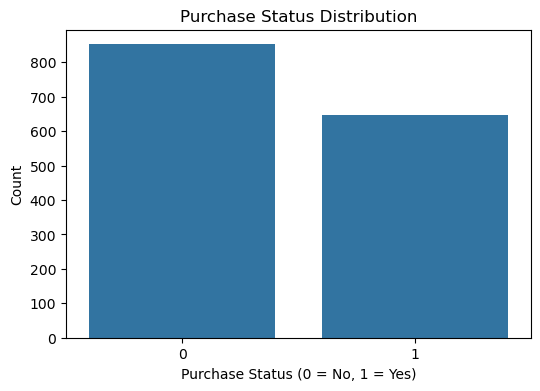

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=df)
plt.title("Purchase Status Distribution")
plt.xlabel("Purchase Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [6]:
X = df.drop("PurchaseStatus", axis=1)
y = df["PurchaseStatus"]


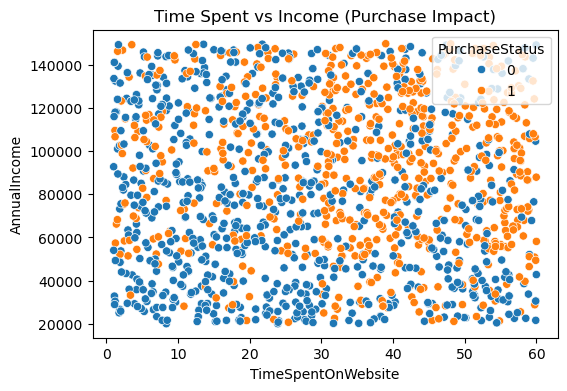

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='TimeSpentOnWebsite',
    y='AnnualIncome',
    hue='PurchaseStatus',
    data=df
)
plt.title("Time Spent vs Income (Purchase Impact)")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
svm_model = SVC(kernel='rbf', C=1)
svm_model.fit(X_train_scaled, y_train)


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
y_pred_svm = svm_model.predict(X_test_scaled)


In [12]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.89      0.80      0.84       128

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



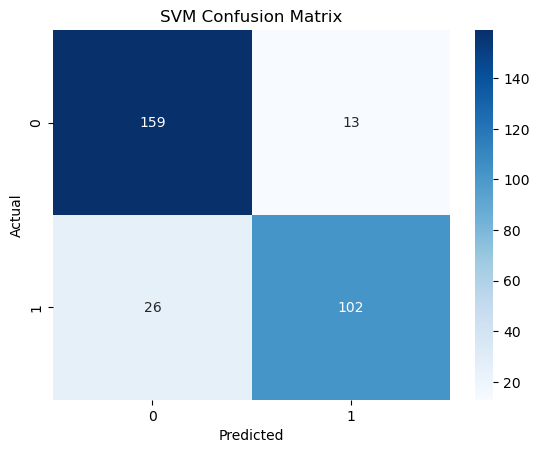

In [13]:
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8366666666666667


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9533333333333334


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8333333333333334


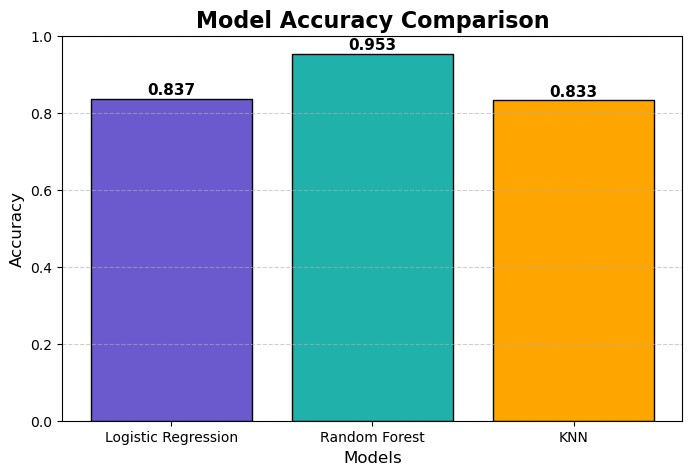

In [20]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = [
    'Logistic Regression',
    'Random Forest',
    'KNN'
]

accuracies = [
    0.8366666666666667,
    0.9533333333333334,
    0.8333333333333334
]

plt.figure(figsize=(8,5))

colors = ['#6a5acd', '#20b2aa', '#ffa500']  # cool colors

bars = plt.bar(models, accuracies, color=colors, edgecolor='black')

plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{height:.3f}",
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


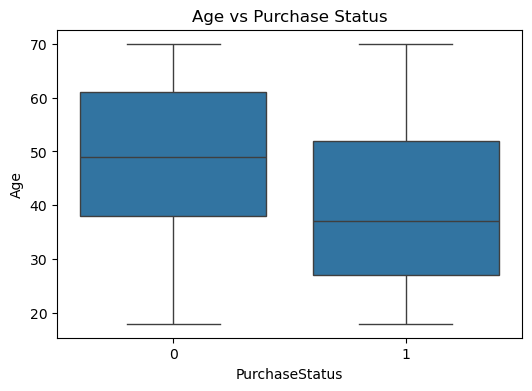

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='PurchaseStatus', y='Age', data=df)
plt.title("Age vs Purchase Status")
plt.show()
